In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "indian-food-101"

## An Exploratory Data Analysis (EDA) of Indian Food. 


# What we want to know

1. Which flavor is the most preferred?
2. Which flavor requires the most cooking time?
3. Which state has the most number of dishes?
4. What is the diet based on region?
5. Which dish has the highest total cooking time?
6. Which are the most common ingredients used throughout the country?

# Prepare



Reliable - Unsure 
Original - Yes, the orginial data source is in Kaggle 
Comprehensive - Yes, most of the regions and states have been covered
Current - No, the metadata shows that it is from 2017
Cited - In the metadata

# Process

We will begin by installing and loading the packages. The data is loaded using the read.csv() function. To understand our data we will use the head(), str(), colnames(), and summary() functions. The unique values of the columes can be know using the unique() function.

In [2]:
library(ggplot2)


In [3]:
food_data <- read.csv("../input/indian-food-101/indian_food.csv")

In [4]:
head(food_data)
str(food_data)
summary(food_data)
colnames(food_data)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
6,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East


'data.frame':	255 obs. of  9 variables:
 $ name          : chr  "Balu shahi" "Boondi" "Gajar ka halwa" "Ghevar" ...
 $ ingredients   : chr  "Maida flour, yogurt, oil, sugar" "Gram flour, ghee, sugar" "Carrots, milk, sugar, ghee, cashews, raisins" "Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom" ...
 $ diet          : chr  "vegetarian" "vegetarian" "vegetarian" "vegetarian" ...
 $ prep_time     : int  45 80 15 15 15 10 10 10 20 10 ...
 $ cook_time     : int  25 30 60 30 40 50 50 20 30 40 ...
 $ flavor_profile: chr  "sweet" "sweet" "sweet" "sweet" ...
 $ course        : chr  "dessert" "dessert" "dessert" "dessert" ...
 $ state         : chr  "West Bengal" "Rajasthan" "Punjab" "Rajasthan" ...
 $ region        : chr  "East" "West" "North" "West" ...


     name           ingredients            diet             prep_time     
 Length:255         Length:255         Length:255         Min.   : -1.00  
 Class :character   Class :character   Class :character   1st Qu.: 10.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 10.00  
                                                          Mean   : 31.11  
                                                          3rd Qu.: 20.00  
                                                          Max.   :500.00  
   cook_time      flavor_profile        course             state          
 Min.   : -1.00   Length:255         Length:255         Length:255        
 1st Qu.: 20.00   Class :character   Class :character   Class :character  
 Median : 30.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 34.53                                                           
 3rd Qu.: 40.00                                                           
 Max.   :720.00          

[1] "name"           "ingredients"    "diet"           "prep_time"     
[5] "cook_time"      "flavor_profile" "course"         "state"         
[9] "region"

In [5]:
unique(food_data$state)
unique(food_data$flavor_profile)
unique(food_data$course)
unique(food_data$region)

[1] "West Bengal"     "Rajasthan"       "Punjab"          "Uttar Pradesh"  
 [5] "-1"              "Odisha"          "Maharashtra"     "Uttarakhand"    
 [9] "Assam"           "Bihar"           "Andhra Pradesh"  "Karnataka"      
[13] "Telangana"       "Kerala"          "Tamil Nadu"      "Gujarat"        
[17] "Tripura"         "Manipur"         "Nagaland"        "NCT of Delhi"   
[21] "Jammu & Kashmir" "Chhattisgarh"    "Haryana"         "Madhya Pradesh" 
[25] "Goa"

[1] "sweet"  "spicy"  "bitter" "-1"     "sour"

[1] "dessert"     "main course" "starter"     "snack"

[1] "East"       "West"       "North"      "-1"         "North East"
[6] "South"      "Central"    ""

The missing values are replaced with "None" and "unknown"

In [6]:
indian_food <- food_data %>% 
mutate(state = str_replace(string = state, pattern = "-1", replacement = "None"), 
      region = str_replace(string = region, pattern = "-1", replacement = "None"), 
      flavor_profile = str_replace(string = flavor_profile, pattern = "-1", replacement = "unknown"), 
      prep_time = ifelse(prep_time == -1, 0, prep_time), 
    cook_time = ifelse(cook_time == -1, 0, cook_time))


In [7]:
flavor_profile<- indian_food %>%
count(flavor_profile)
flavor_profile


flavor_profile,n
<chr>,<int>
bitter,4
sour,1
spicy,133
sweet,88
unknown,29


In [8]:
courses <- indian_food %>%
count(course)
courses

course,n
<chr>,<int>
dessert,85
main course,129
snack,39
starter,2


Combine prep_time and cook_time into one column- "total_cooking_time"

In [9]:
cleaned_food<- indian_food %>%
mutate(total_cookingtime= prep_time + cook_time) %>%
select(-(prep_time),-(cook_time))

In [10]:
summary(cleaned_food)

     name           ingredients            diet           flavor_profile    
 Length:255         Length:255         Length:255         Length:255        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    course             state              region          total_cookingtime
 Length:255         Length:255         Length:255         Min.   :  0.00   
 Class :character   Class :character   Class :character   1st Qu.: 30.00   
 Mode  :character   Mode  :character   Mode  :character   Median : 50.00   
                                                          Mean   : 65.86   
                                                          3rd Qu.: 60.00   
     

# Analyze

## 1. Which is the preferred flavor throughtout the nation?

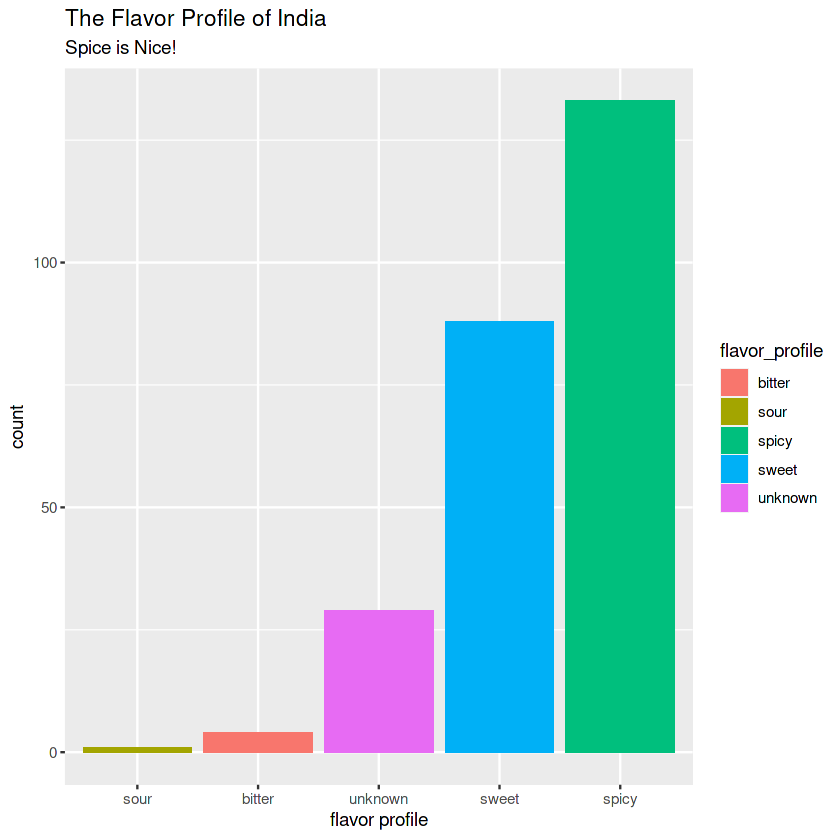

In [11]:
ggplot(flavor_profile) + geom_col(mapping=aes(x=reorder(flavor_profile,n), y=n, fill= flavor_profile))+ labs(title="The Flavor Profile of India",x="flavor profile", y= "count",subtitle= "Spice is Nice!")

## 2. Which flavor profile requires the most cooking time?

In [12]:
cooktime_flavor <- cleaned_food %>%
group_by(flavor_profile) %>%
summarise(Mean_Cookingtime = mean(total_cookingtime)) %>%
    arrange(flavor_profile)
head(cooktime_flavor)

flavor_profile,Mean_Cookingtime
<chr>,<dbl>
bitter,52.50000
sour,20.00000
spicy,63.55639
sweet,72.69318
unknown,59.13793


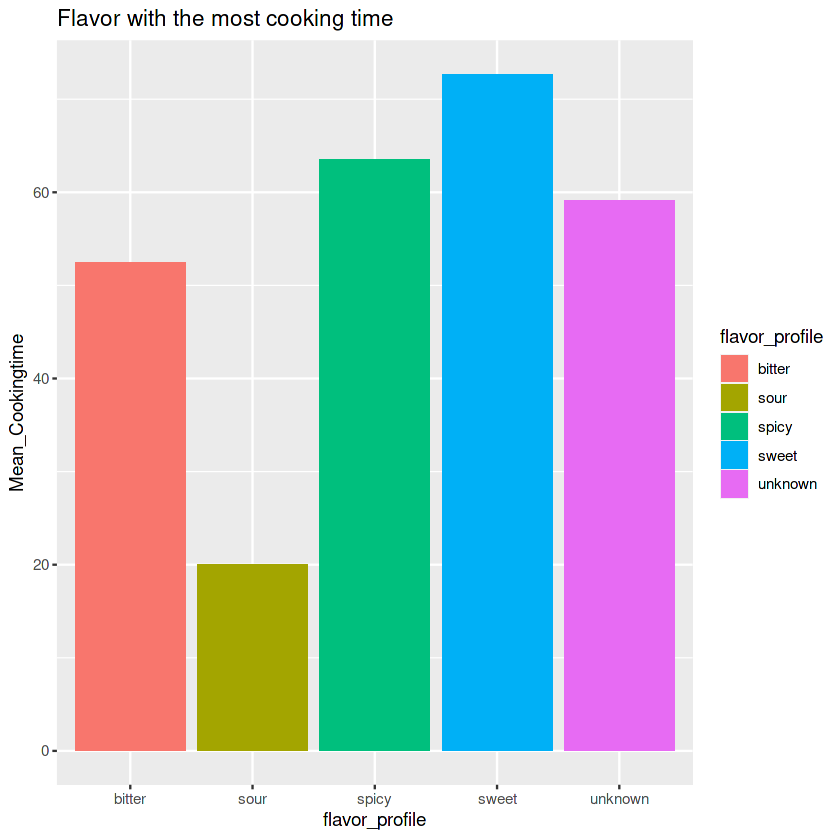

In [13]:
ggplot(data=cooktime_flavor) + geom_col(mapping=aes(x= flavor_profile, y= Mean_Cookingtime, fill = flavor_profile)) + labs(title = "Flavor with the most cooking time")

## 3. Which are the top 10 states with the most number of disher?

In [14]:
state<-cleaned_food %>%
group_by(state) %>%
count(state) %>%
arrange(desc(n)) %>%
head(10)
state

state,n
<chr>,<int>
Gujarat,35
Punjab,32
Maharashtra,30
None,24
West Bengal,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


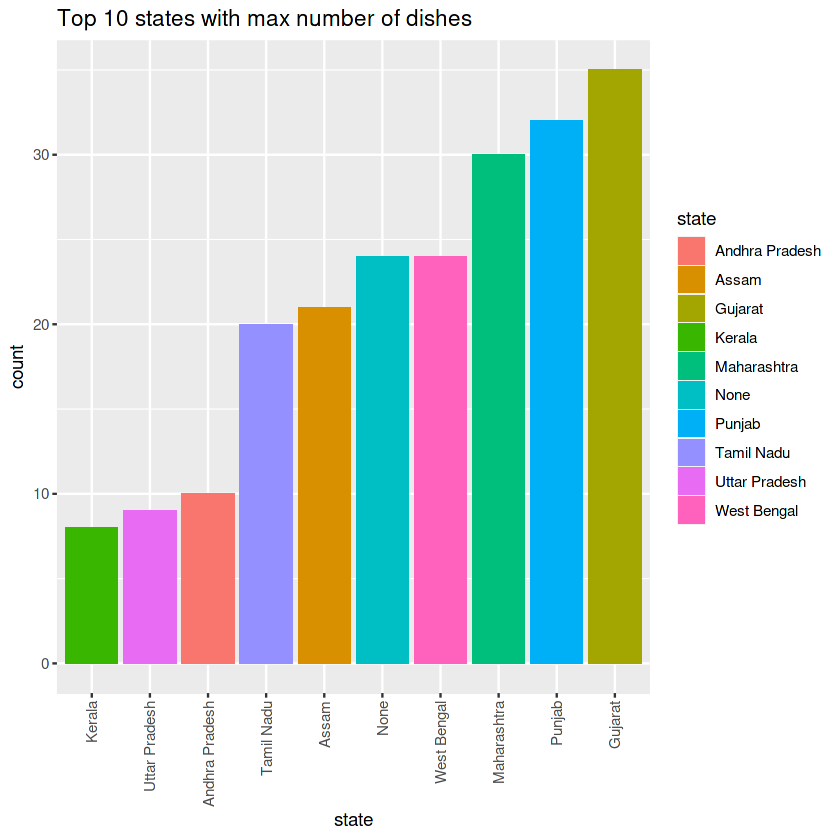

In [15]:
ggplot(data=state) + geom_col(mapping=aes(x= reorder(state,n), y = n, fill=state))+ labs(title="Top 10 states with max number of dishes", x= "state", y= "count") +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

## 4. What is the diet based on region

In [16]:
diet_by_region <- cleaned_food %>%
select(diet, region) %>%
group_by(region) %>%
count(diet)


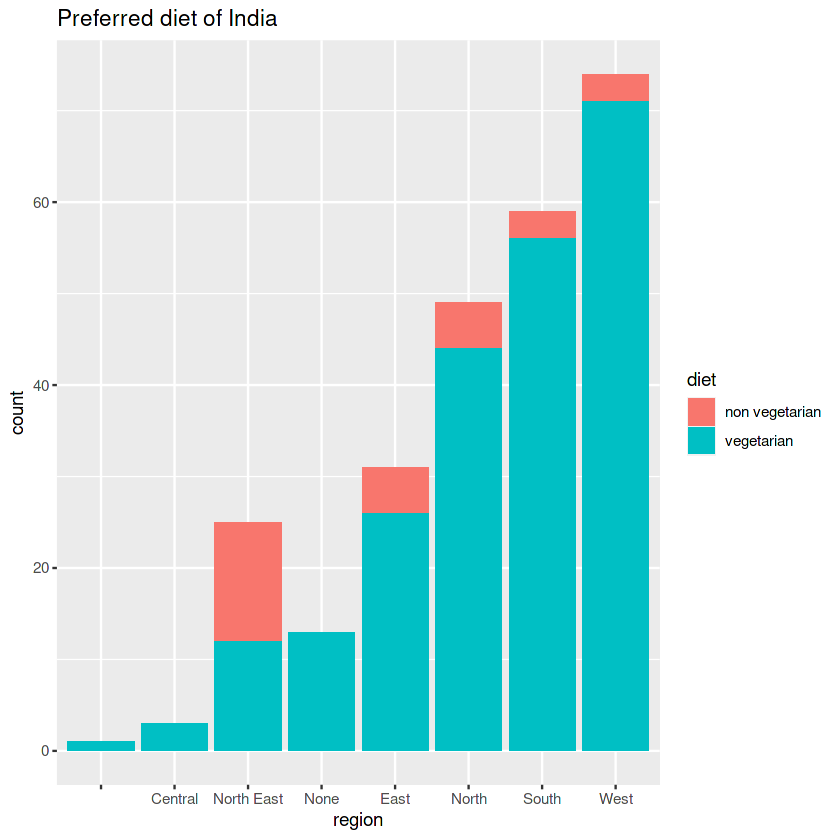

In [17]:
ggplot(data=diet_by_region) + geom_col(aes(x=reorder(region,n), y= n, fill=diet)) + labs(title = "Preferred diet of India", x = "region", y= "count")


## 5. Which dish has the most total cooking time?

In [18]:
dish_cookingtime <- cleaned_food %>%
select(name, total_cookingtime) %>%
arrange(desc(total_cookingtime)) %>%
head(10)
dish_cookingtime

,name,total_cookingtime
,<chr>,<dbl>
1,Shrikhand,730
2,Pindi chana,620
3,Puttu,535
4,Misti doi,510
5,Dosa,450
6,Idli,450
7,Masala Dosa,450
8,Poornalu,300
9,Chak Hao Kheer,285


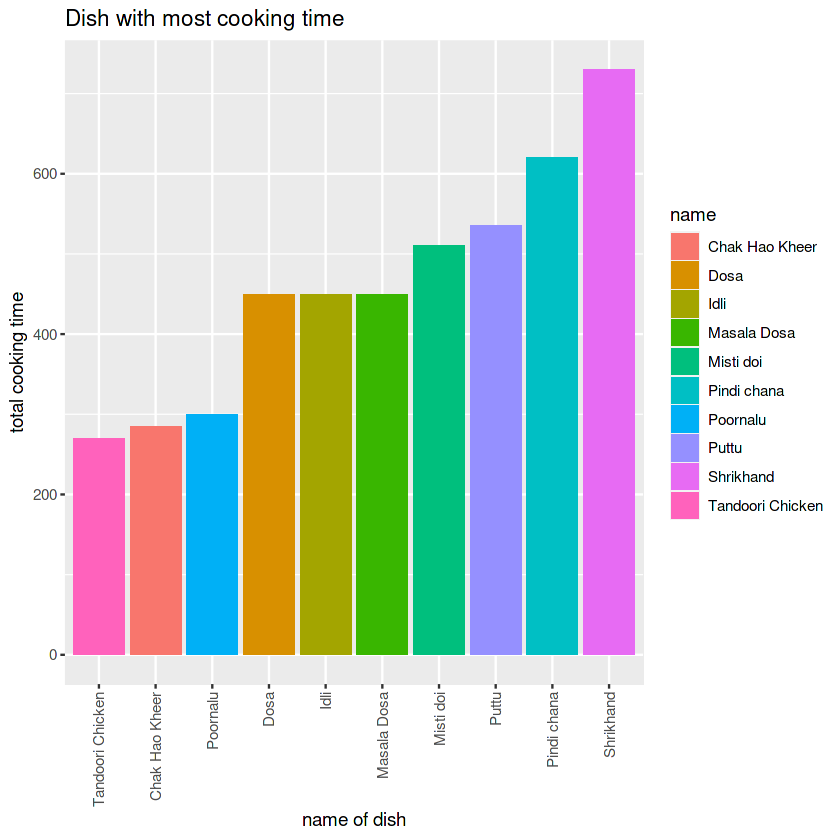

In [19]:
ggplot(data=dish_cookingtime) + geom_col(aes(x=reorder(name,total_cookingtime), y= total_cookingtime, fill=name)) + 
labs(title = "Dish with most cooking time", x="name of dish", y = "total cooking time") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


## 6. Which are the most common ingredients used all over the country

In [20]:
ingredients <- cleaned_food %>%
 select(ingredients) %>%
 mutate(ingredients = str_split(ingredients,' ')) %>%
 unnest(ingredients) %>%
 group_by(ingredients) %>%
 count() %>%
 arrange(desc(n)) %>%
 head(20)
 

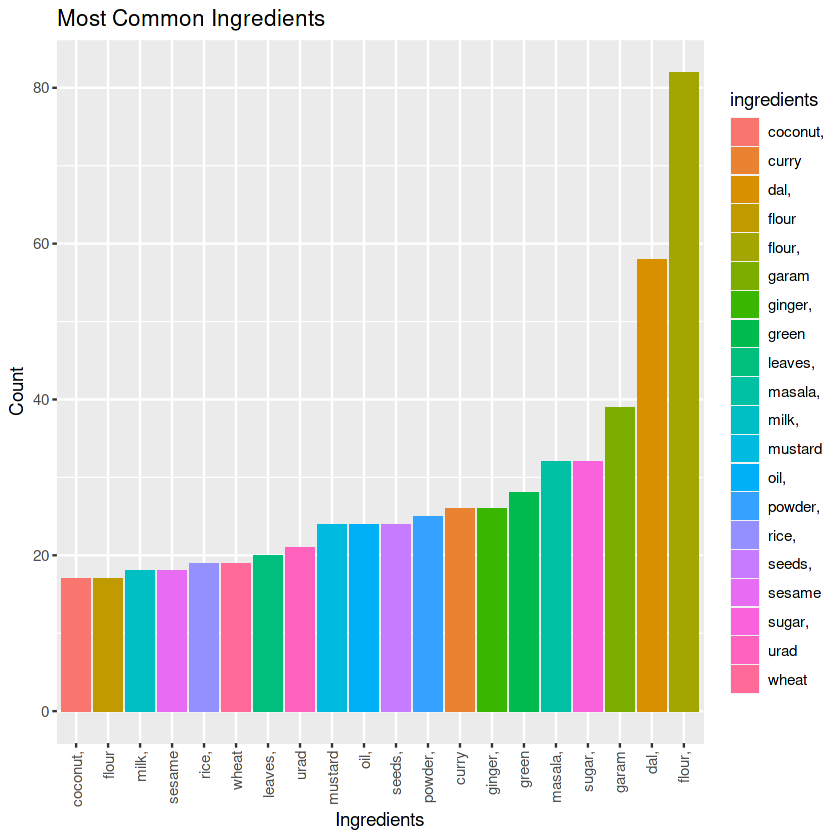

In [21]:
ggplot(data= ingredients) + geom_col(aes(x = reorder(ingredients,n), y = n, fill = ingredients)) +
 labs(title = 'Most Common Ingredients',x = 'Ingredients',y = 'Count') +
 theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [22]:
# Share

1. The preferred flavor is "spicy".
2. Sweet dishes take the most amount of cooking time.
3. The states Gujarat, Punjab, and Maharashtra top the list for most number of dishes. 
4. A vegetarian diet is what seems to be the preferred diet throughout the country.
5. Shrikhand has the highest total cooking time (includes preparation time and actual cooking time).
6. Some of the most commong ingredients are flour, sugar, dal, and gram masala.


ERROR: Error in parse(text = x, srcfile = src): <text>:3:4: unexpected symbol
2: 
3: 1. The
      ^
